In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('./data/All_Seasons_Data.csv')

In [3]:
# Check cols, data types, and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89884 entries, 0 to 89883
Data columns (total 23 columns):
Season      89884 non-null int64
Name        89830 non-null object
Team        89884 non-null object
G           89884 non-null int64
PA          89884 non-null int64
HR          89884 non-null int64
R           89884 non-null int64
RBI         89584 non-null float64
SB          87784 non-null float64
BB%         89884 non-null object
K%          82844 non-null object
ISO         89884 non-null float64
BABIP       82844 non-null float64
AVG         89884 non-null float64
OBP         89884 non-null float64
SLG         89884 non-null float64
wOBA        89884 non-null float64
wRC+        84026 non-null float64
BsR         89884 non-null float64
Off         89884 non-null float64
Def         89884 non-null float64
WAR         89884 non-null float64
playerid    89884 non-null int64
dtypes: float64(13), int64(6), object(4)
memory usage: 15.8+ MB


In [4]:
df.head()

,Season,Name,Team,G,PA,HR,R,RBI,SB,BB%,...,AVG,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid
0,1933,Jim Levey,Browns,141,567,2,43,36.0,4.0,4.60%,...,0.195,0.237,0.240,0.227,23.0,-1.7,-60.1,0.5,-4.0,1007567
1,1977,Jerry Royster,Braves,140,491,6,64,28.0,28.0,7.70%,...,0.216,0.278,0.288,0.258,45.0,1.9,-31.1,-21.9,-3.8,1011270
2,1930,Tommy Thevenow,Phillies,156,624,0,57,78.0,1.0,3.70%,...,0.286,0.316,0.326,0.297,48.0,0.2,-50.9,-10.4,-3.6,1012952
3,1931,Jim Levey,Browns,139,540,5,53,38.0,13.0,6.50%,...,0.209,0.264,0.285,0.259,40.0,-1.0,-44.9,-8.4,-3.3,1007567
4,1899,Sport McAllister,Spiders,113,451,1,29,31.0,5.0,4.20%,...,0.237,0.273,0.297,0.275,57.0,-1.8,-29.7,-21.9,-3.2,1008324


In [5]:
# Add folder to path to import my Stats class
import sys
sys.path.append('../Basketball')
print(sys.path)
from Stats2 import Stats

In [6]:
stat_df = Stats(df)
print(stat_df.__class__.__name__)
print(stat_df.__class__.__bases__)

Stats
(<class 'pandas.core.frame.DataFrame'>,)


In [7]:
print(type(stat_df))
print(id(stat_df))

<class 'Stats2.Stats'>
2524771435072


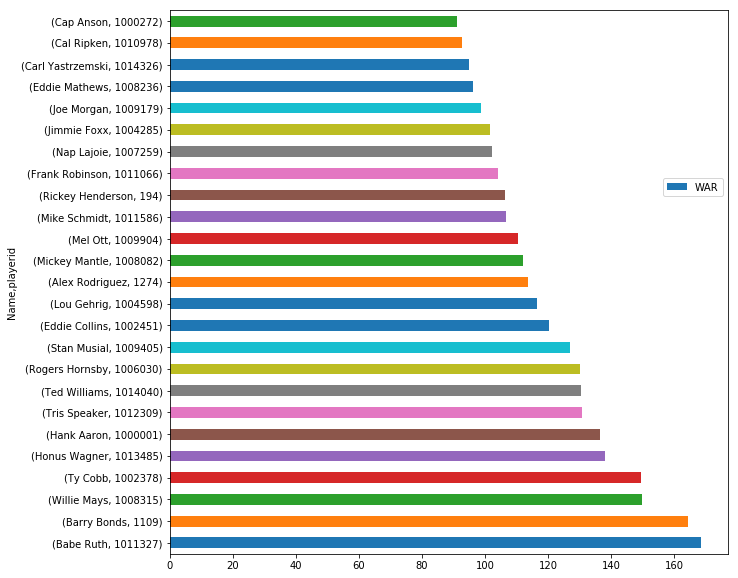

In [8]:
plt.figure(figsize=(10,10))
stat_df.groupby(['Name', 'playerid'])['WAR'].sum().nlargest(25).plot('barh')
plt.legend(bbox_to_anchor=(1,0.7))

In [9]:
print(sys.path)

['', 'C:\\Anaconda3\\python36.zip', 'C:\\Anaconda3\\DLLs', 'C:\\Anaconda3\\lib', 'C:\\Anaconda3', 'C:\\Anaconda3\\lib\\site-packages', 'C:\\Anaconda3\\lib\\site-packages\\Mako-1.0.7-py3.6.egg', 'C:\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\afs95\\.ipython', '../Basketball']


Text(0,0.5,'Player')

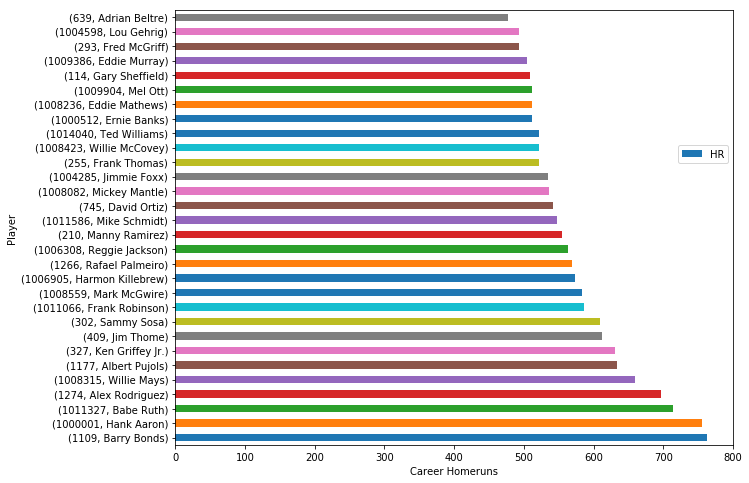

In [10]:
hrgroup = stat_df.groupby(['playerid','Name'])['HR'].sum()
plt.figure(figsize=(10,8))
hrgroup.nlargest(30).plot('barh')
plt.legend(bbox_to_anchor=(1,0.7))
plt.xlabel('Career Homeruns')
plt.ylabel('Player')

In [11]:
print(stat_df[stat_df['playerid'] == 255]['Name'].iloc[0])
print(str('-' * 25))
print('Homeruns: %.2f' % stat_df[stat_df['playerid'] == 255]['HR'].sum())

Frank Thomas
-------------------------
Homeruns: 521.00


In [12]:
#sns.barplot(x='Name',y='WAR', data=wargroup.nlargest(25, 'WAR'))

In [38]:
wargroup = stat_df.groupby(['Name', 'playerid'])['WAR'].sum().reset_index()

In [14]:
df = sns.load_dataset('tips')

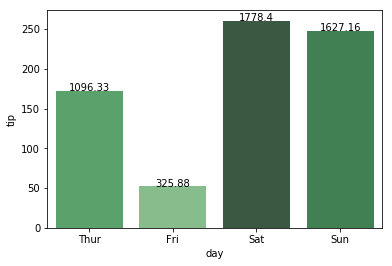

In [16]:
groupedvalues=df.groupby('day').sum().reset_index()

pal = sns.color_palette("Greens_d", len(groupedvalues))
rank = groupedvalues["total_bill"].argsort().argsort() 
g=sns.barplot(x='day',y='tip',data=groupedvalues, palette=np.array(pal[::-1])[rank])

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

plt.show()

In [17]:
wargroup.nlargest(25, 'WAR').index

Int64Index([  914,   944, 18014, 17482,  8183,  7681, 17437, 16681, 15326,
            16323,  5764, 12185,   443, 12979, 12874, 13363, 15119,  6544,
            13564,  9746, 10106,  5797,  2884,  2800,  2832],
           dtype='int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [20]:
wargroup.nlargest(25, 'WAR').__class__

pandas.core.frame.DataFrame

In [21]:
groupedvalues

,day,total_bill,tip,size
0,Thur,1096.33,171.83,152
1,Fri,325.88,51.96,40
2,Sat,1778.40,260.40,219
3,Sun,1627.16,247.39,216


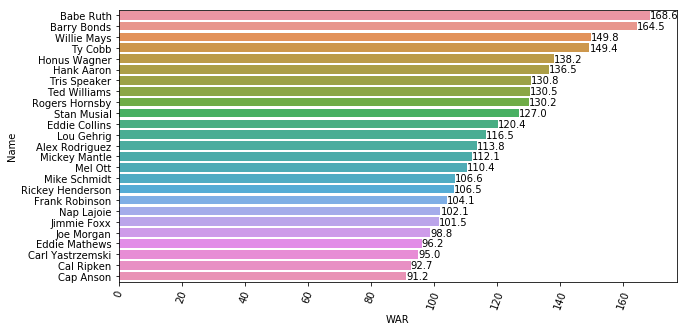

In [29]:
# Horizontal Boxplot
plt.figure(figsize=(10,5))
g = sns.barplot(y='Name',x='WAR', data=wargroup.nlargest(25, 'WAR'))

# Does not work for some reason
# Possibly due to the indexing?
# Creating i = 0 and designating that as x works
#i = 0
#for index, row in wargroup.nlargest(25, 'WAR').iterrows():
    #g.text(i, row['WAR'], round(row['WAR'], 1), color='black', ha="center")
    #i += 1
    
#for col in wargroup.nlargest(25, 'WAR'):
    #%debug
# This works! Enumerate creates new index
for index, val in enumerate(wargroup.nlargest(25, 'WAR')['WAR']):
    g.text(val,index,round(val,1), color='black', ha="left", va='center')    
    
g.tick_params(axis='x', rotation=70, right=True)
#plt.xticks(rotation=70, ha='right')
plt.show()

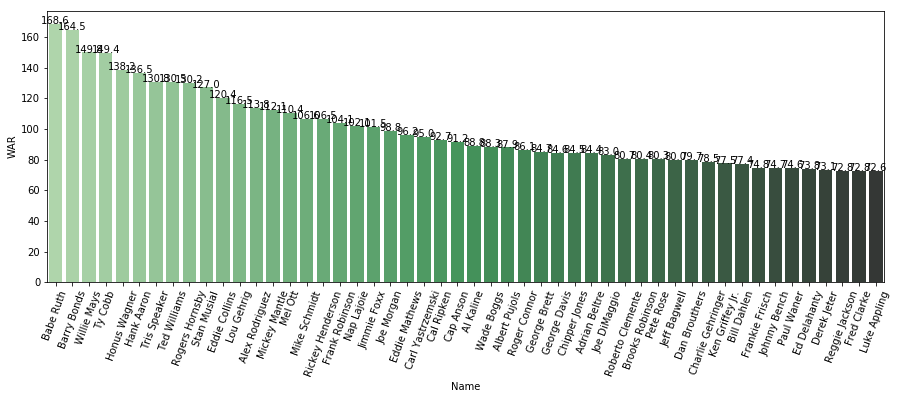

In [50]:
# Vertical Boxplot
plt.figure(figsize=(15,5))
pal = sns.color_palette("Greens_d", len(wargroup.nlargest(50, 'WAR')))
g = sns.barplot(x='Name',y='WAR', data=wargroup.nlargest(50, 'WAR'), palette=np.array(pal)[::-1])


#i = 0
#for index, row in wargroup.nlargest(25, 'WAR').iterrows():
#    g.text(i, row['WAR'], round(row['WAR'], 1), color='black', ha="center")
#    i += 1
#for col in wargroup.nlargest(25, 'WAR'):
    #%debug
for index, val in enumerate(wargroup.nlargest(50, 'WAR')['WAR']):
    g.text(index,val,round(val,1), color='black', ha="center")    
    
g.tick_params(axis='x', rotation=70, right=True)
#plt.xticks(rotation=70, ha='right')
plt.show()

In [32]:
stat_df.columns

Index(['Season', 'Name', 'Team', 'G', 'PA', 'HR', 'R', 'RBI', 'SB', 'BB%',
       'K%', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'BsR', 'Off',
       'Def', 'WAR', 'playerid'],
      dtype='object')

In [39]:
sum_pivot = stat_df.pivot_table(index=['Name', 'playerid'], values=['G', 'PA', 'HR', 'R', 'RBI', 
                                                                    'SB', 'BsR', 'Off', 'Def', 'WAR'], aggfunc=np.sum)
sum_pivot.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18208 entries, 0 to 18207
Data columns (total 12 columns):
Name        18208 non-null object
playerid    18208 non-null int64
BsR         18208 non-null float64
Def         18208 non-null float64
G           18208 non-null int64
HR          18208 non-null int64
Off         18208 non-null float64
PA          18208 non-null int64
R           18208 non-null int64
RBI         18208 non-null float64
SB          18208 non-null float64
WAR         18208 non-null float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [48]:
sum_pivot.melt()[-6:]

,variable,value
182074,WAR,0.0
182075,WAR,1.5
182076,WAR,0.1
182077,WAR,-0.5
182078,WAR,-0.4
182079,WAR,13.6


In [51]:
sum_pivot.describe()

,BsR,Def,G,HR,Off,PA,R,RBI,SB,WAR
count,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000,18208.000000
mean,0.005487,2.697946,288.170969,16.529657,-5.491509,917.309040,108.671848,97.935468,16.871485,2.813653
std,6.141662,30.656580,462.147889,51.986047,61.390899,1848.144342,244.232417,227.932800,55.946002,10.074926
min,-88.800000,-300.700000,1.000000,0.000000,-333.300000,0.000000,0.000000,0.000000,0.000000,-16.300000
25%,-0.300000,-1.200000,16.000000,0.000000,-16.200000,10.000000,1.000000,0.000000,0.000000,-0.200000
50%,0.000000,0.200000,85.000000,0.000000,-3.100000,103.000000,8.000000,6.000000,0.000000,0.000000
75%,0.000000,4.100000,335.000000,5.000000,-0.300000,763.250000,75.000000,64.000000,6.000000,0.500000
max,144.400000,375.100000,3562.000000,762.000000,1347.300000,15876.000000,2295.000000,2297.000000,1406.000000,168.600000


In [52]:
sum_pivot['HR/PA'] = sum_pivot['HR'] / sum_pivot['PA']

In [61]:
sum_pivot['HR/PA'].fillna(0, inplace=True)

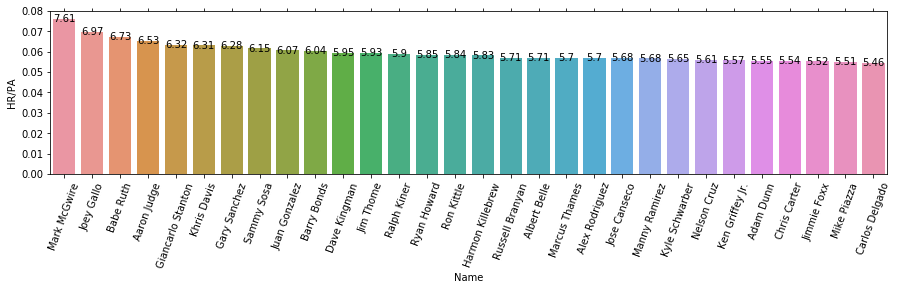

In [95]:
# Vertical Boxplot
plt.figure(figsize=(15,3))
g = sns.barplot(x='Name', y='HR/PA', data=sum_pivot[sum_pivot['PA'] > 1000]['HR/PA'].nlargest(30).reset_index())

i = 0
for index, row in sum_pivot[sum_pivot['PA'] > 1000]['HR/PA'].nlargest(30).reset_index().iterrows():
    g.text(i, row['HR/PA'], str(round(row['HR/PA']*100,2)), ha='center', va='center')
    i += 1
    
g.tick_params(axis='x', rotation=70, right=True, top=True)
plt.show()

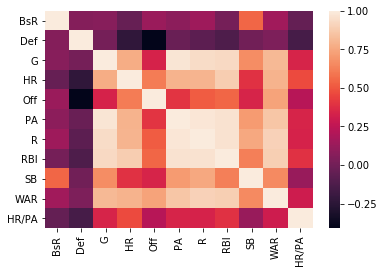

In [97]:
sns.heatmap(sum_pivot.corr())

In [108]:
standard = pd.read_csv('./All_Seasons_Standard.csv')
standard = Stats(standard)
standard.info()

<class 'Stats2.Stats'>
RangeIndex: 89884 entries, 0 to 89883
Data columns (total 24 columns):
Season      89884 non-null int64
Name        89830 non-null object
Team        89884 non-null object
G           89884 non-null int64
AB          89884 non-null int64
PA          89884 non-null int64
H           89884 non-null int64
1B          89884 non-null int64
2B          89884 non-null int64
3B          89884 non-null int64
HR          89884 non-null int64
R           89884 non-null int64
RBI         89584 non-null float64
BB          89884 non-null int64
IBB         55941 non-null float64
SO          82844 non-null float64
HBP         87370 non-null float64
SF          56457 non-null float64
SH          84156 non-null float64
GDP         65700 non-null float64
SB          87784 non-null float64
CS          68328 non-null float64
AVG         89884 non-null float64
playerid    89884 non-null int64
dtypes: float64(10), int64(12), object(2)
memory usage: 16.5+ MB


In [104]:
str(standard['Season'].iloc[0])[-2:]

'74'